**<font size="+1">Thực hiện việc rút gọn số chiều dữ liệu, sau đó hiển thị trực quan 
các phân lớp dữ liệu dạng
 2D.</font>**

1. Khai báo thư viện cần thiết

In [1]:
import os
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

2. Khai báo đường dẫn đến tệp dữ liệu

In [2]:
data_path = 'D:/Code/python/mat3533/project/data/'
# train path
train_images_path = os.path.join(data_path, 'train-images-idx3-ubyte.gz')
train_labels_path = os.path.join(data_path, 'train-labels-idx1-ubyte.gz')
# test path
test_images_path = os.path.join(data_path, 't10k-images-idx3-ubyte.gz')
test_labels_path = os.path.join(data_path, 't10k-labels-idx1-ubyte.gz')

3. Định nghĩa hàm `get_mnist_data` để tải dữ liệu từ tệp gzip chứa hình ảnh và nhãn của bộ dữ liệu<br>
+ Hàm nhận vào các tham số:<br>
    + `images_path`: đường dẫn đến tệp dữ liệu hình ảnh<br>
    + `labels_path`: đường dẫn đến tệp nhãn<br>
    + `num_images`: số lượng hình ảnh cần tải<br>
    + `shuffle`: cho phép trộn dữ liệu, mặc định là `False`<br>
    + `_is`: chỉ ra đây là dữ liệu huấn luyện hay kiểm tra, mặc định là `True`
    + `image_size`: kích thước của hình ảnh, mặc định là 28px x 28px<br>
+ Hàm trả về một mảng chứa hình ảnh và một mảng chứ nhãn tương ứng<br>

In [9]:
def get_mnist_data(images_path, labels_path, num_images, shuffle=False, _is=True, image_size=28):
    """
    This shuffle param is active when .gz is downloaded at:
    - 'http://yann.lecun.com/exdb/mnist/'
    - This function return random num_images in 60000 or 10000
    """
    import gzip 
    f_images = gzip.open(images_path,'r')
    f_images.read(16)
    real_num = num_images if not shuffle else (60000 if _is else 10000)
    buf_images = f_images.read(image_size * image_size * real_num)
    images = np.frombuffer(buf_images, dtype=np.uint8).astype(np.float32)
    images = images.reshape(real_num, image_size, image_size,)
    f_labels = gzip.open(labels_path,'r')
    f_labels.read(8)
    labels = np.zeros((real_num)).astype(np.int64)
    for i in range(0, real_num):
        buf_labels = f_labels.read(1)
        labels[i] = np.frombuffer(buf_labels, dtype=np.uint8).astype(np.int64)

    if shuffle is True:
        rand_id = np.random.randint(real_num, size=num_images)
        images = images[rand_id, :]
        labels = labels[rand_id,]
    images = images.reshape(num_images, image_size * image_size)
    return images, labels

4. Sử dụng hàm `get_mnist_data` lấy dữ liệu train, test từ tệp dữ liệu

In [10]:
train_images, train_labels = get_mnist_data(
    train_images_path, train_labels_path, 60000)
test_images, test_labels = get_mnist_data(
    test_images_path, test_labels_path, 10000, _is=False)
print(train_images.shape, train_labels.shape)
print(test_images.shape, test_labels.shape)

(60000, 784) (60000,)
(10000, 784) (10000,)


5. Kiểm tra một số hình ảnh và nhãn tương ứng của dữ liệu train

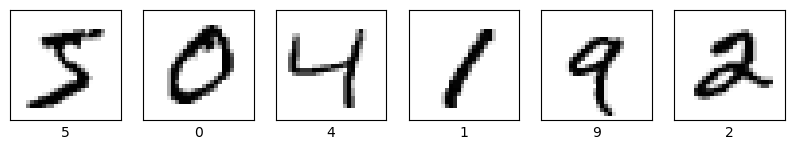

In [11]:
plt.figure(figsize=(10,2))
for i in range(6):
    plt.subplot(1,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])

6. Chuẩn hóa dữ liệu

In [15]:
scaler = StandardScaler()
train_x = scaler.fit_transform(train_images)
print(train_x.shape)

(60000, 784)


7. Dùng PCA giảm số chiều dữ liệu xuống 2 chiều

In [16]:
pca = PCA(n_components=2)
train_pca_02 = pca.fit_transform(train_x)
principal_df = pd.DataFrame(data = train_pca_02
             , columns = ['pc01', 'pc02'])
principal_df.shape

(60000, 2)

**8. Trực quan các phân lớp dữ liệu ở dạng 2D:**<br>
Mỗi điểm trên biểu đồ đại diện cho một hình ảnh từ tập dữ liệu, được tô màu dựa theo nhãn tương ứng

Text(0, 0.5, 'Principal Component 02')

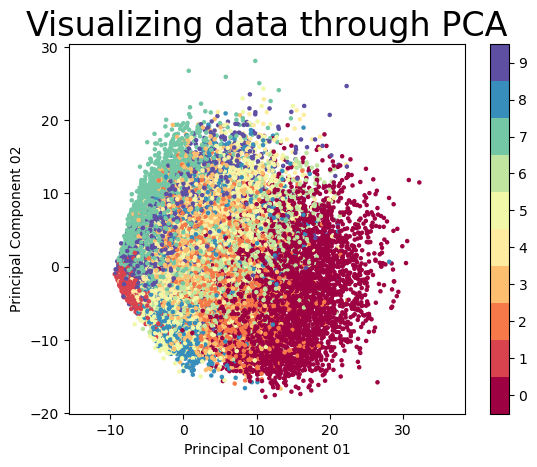

In [17]:
plt.scatter(train_pca_02[:, 0], train_pca_02[:, 1], s= 5, c=train_labels, cmap='Spectral')
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('Visualizing data through PCA', fontsize=24)
plt.xlabel('Principal Component 01')
plt.ylabel('Principal Component 02')